# Esercizio 07.1

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

### Autocorrelazione:

Di seguito sono mostrati i valori della covarianza delle grandezze misurate al variare della distanza (in passi di simulazione) tra i valori campionati (autocorrelazione). E\' evidente come già a distanze inferiori a 500 passi di simulazione i valori campionati risultino sostanzialmente scorrelati. Questo suggerisce che 500 potrebbe essere un buon valore per la dimensioni dei blocchi. 

<span style="color:green">Nota: per lo stato gassoso i valori risultano completamente scorrelati. </span>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

N_part=108

ene_solid=np.loadtxt("07.1_Data/istant_values_solid.dat")[:,0]/N_part
pres_solid=np.loadtxt("07.1_Data/istant_values_solid.dat")[:,1]

ene_liquid = np.loadtxt("07.1_Data/istant_values_liquid.dat")[:,0]/N_part
pres_liquid=np.loadtxt("07.1_Data/istant_values_liquid.dat")[:,1]

ene_gas = np.loadtxt("07.1_Data/istant_values_gas.dat")[:,0]/N_part
pres_gas = np.loadtxt("07.1_Data/istant_values_gas.dat")[:,1]


L = np.zeros(500, dtype=int)
for i in range(len(L)):
    L[i]=10*i+10 
    
def mean(val):
    m=0
    for i in range(len(val)):
        m += val[i]
    return m/len(val)

def error(val):
    return math.sqrt( mean(val*val) - pow(mean(val),2) )

def covariance(val, l):
    j=0
    c=0
    for i in range(5000,len(val)-l-1,1):   #starting from 5000 to exclude not-equilibrated values
        j += 1
        c += val[i]*val[i+l]
    return c/j - pow(mean(val),2)

def blocking_err(val, l):
    nblocks = int(len(val)/l)
    m = np.zeros(nblocks)
    for j in range(nblocks):
        for i in range(l):
            m[j] += val[j*l+i]
    m /= l
    return error(m)/math.sqrt(nblocks-1)
    
def plot_covariance(val, title):
    Covar = np.zeros(len(L))
    for i in range(len(L)):
        Covar[i] = covariance(val, L[i])
    
    fig=plt.figure(figsize=(14, 4))
    plt.plot(L,Covar)
    plt.xlabel('distance')
    plt.ylabel('covariance')
    plt.title(title)
    plt.grid(True)
    plt.show()

def plot_error(val, title):
    Err = np.zeros(len(L))
    for i in range(len(L)):
        Err[i] = blocking_err(val, L[i])
        
    fig=plt.figure(figsize=(14, 4))    
    plt.plot(L,Err)
    plt.xlabel('block size')
    plt.ylabel('error')
    plt.title(title)
    plt.grid(True)
    plt.show()

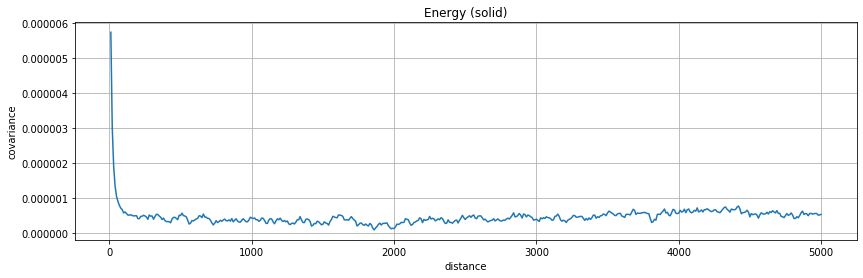

In [2]:
plot_covariance(ene_solid, 'Energy (solid)')

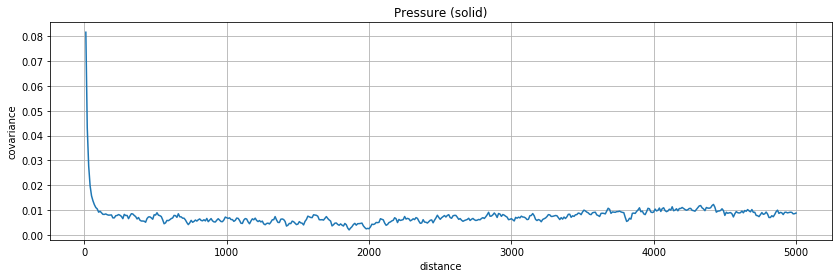

In [3]:
plot_covariance(pres_solid, 'Pressure (solid)')

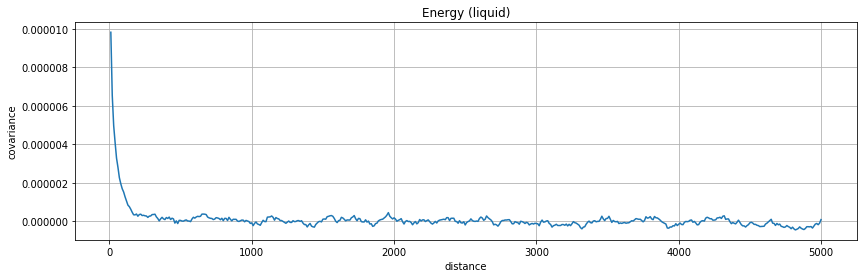

In [4]:
plot_covariance(ene_liquid, 'Energy (liquid)')

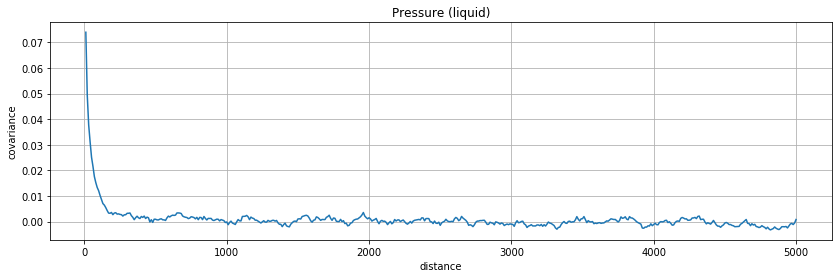

In [5]:
plot_covariance(pres_liquid, 'Pressure (liquid)')

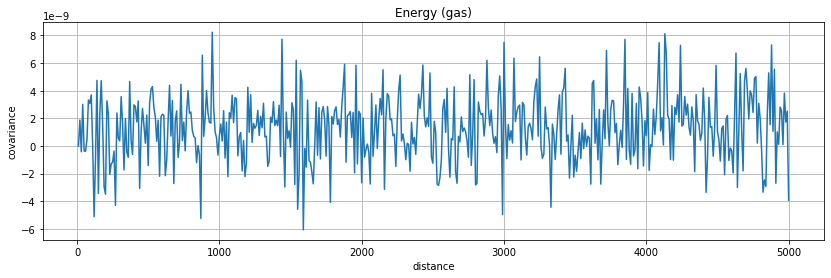

In [6]:
plot_covariance(ene_gas, 'Energy (gas)')

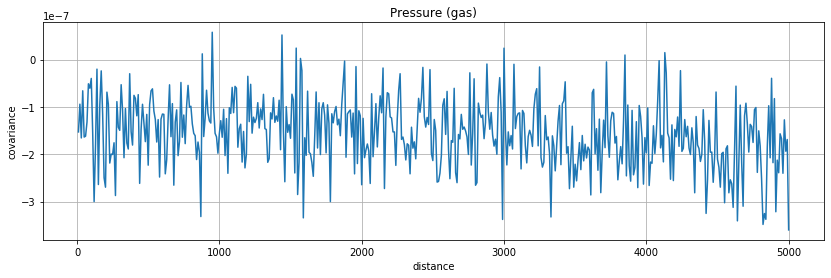

In [7]:
plot_covariance(pres_gas, 'Pressure (gas)')

## Errore stimato:

Nei seguenti grafici è mostrato come varia l'errore stimato al variare del numero della dimensione blocchi. Si osserva che il valore satura per una dimesione dei blocchi tra i 500 e i 1000 step. Per questo motivo si è scelto di utilizzare blocchi da 1000 step per le simulazioni successive.

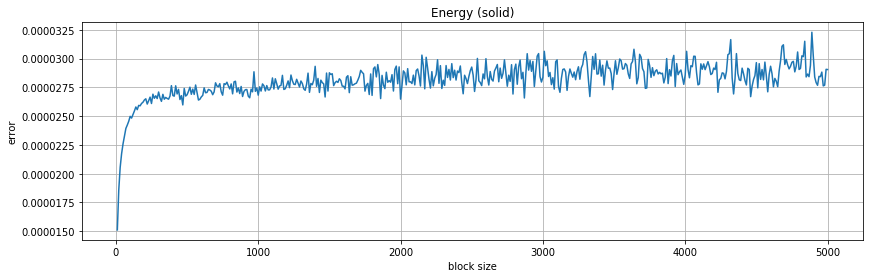

In [8]:
plot_error(ene_solid, 'Energy (solid)')

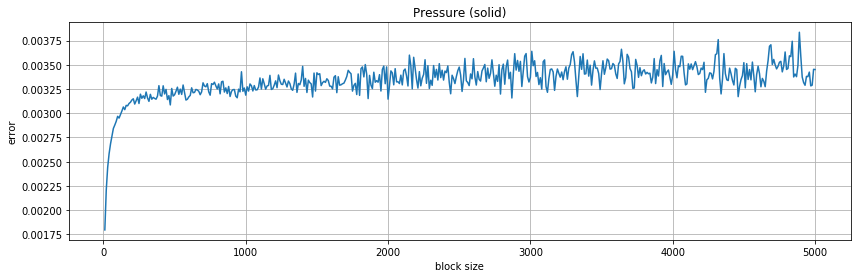

In [9]:
plot_error(pres_solid, 'Pressure (solid)')

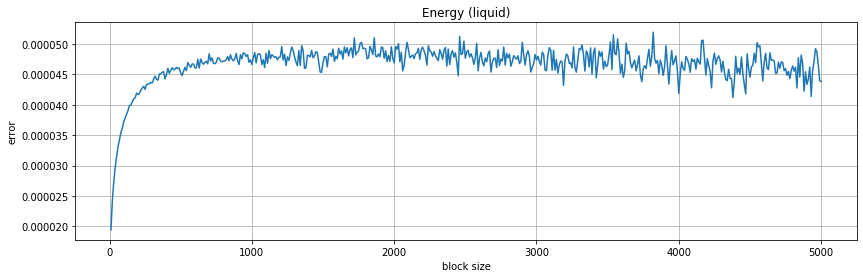

In [10]:
plot_error(ene_liquid, 'Energy (liquid)')

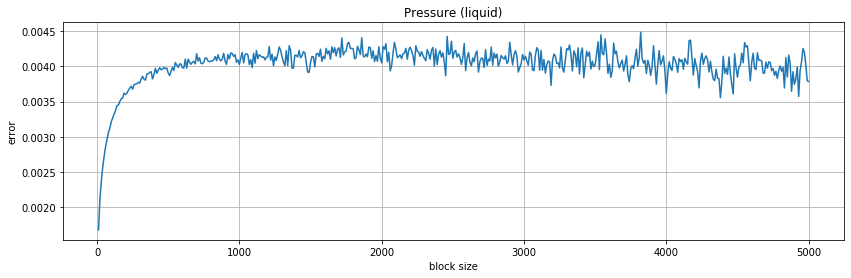

In [11]:
plot_error(pres_liquid, 'Pressure (liquid)')

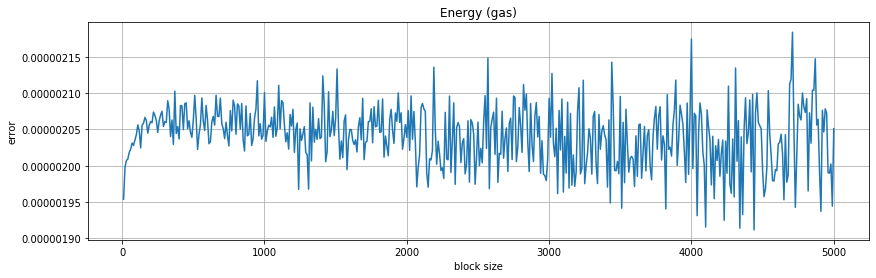

In [12]:
plot_error(ene_gas, 'Energy (gas)')

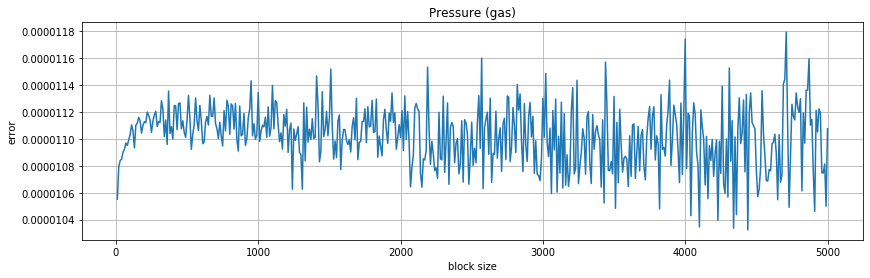

In [13]:
plot_error(pres_gas, 'Pressure (gas)')

# Esercizio 07.2, 3, 4

Simulazione Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) 
## **Fase solida** ($\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$))

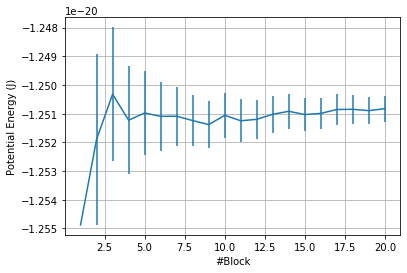

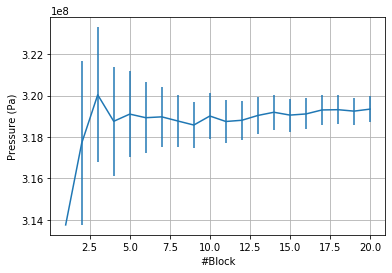

In [14]:
T_conv=120
kb=1.380649E-23
sigma=0.34E-9
P_conv=T_conv*kb/sigma**3

folder="solid_data/"

ave_epot = np.loadtxt(folder+"output.epot.0")
ave_pres = np.loadtxt(folder+"output.pres.0")

plt.errorbar(ave_epot[:,0],ave_epot[:,2] * T_conv * kb,yerr=ave_epot[:,3] * T_conv * kb)
plt.xlabel('#Block')
plt.ylabel('Potential Energy (J)')
plt.grid(True)
plt.show()

plt.errorbar(ave_pres[:,0],ave_pres[:,2] * P_conv ,yerr=ave_pres[:,3] * P_conv)
plt.xlabel('#Block')
plt.ylabel('Pressure (Pa)')
plt.grid(True)
plt.show()

## **Fase liquida** ($\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$))

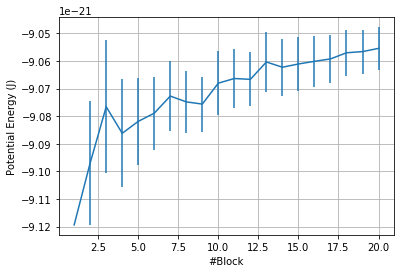

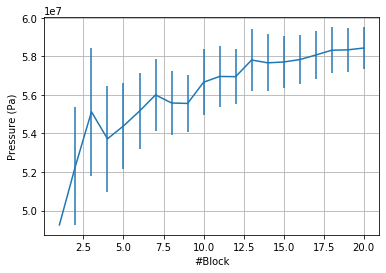

In [15]:
folder="liquid_data/"

ave_epot = np.loadtxt(folder+"output.epot.0")
ave_pres = np.loadtxt(folder+"output.pres.0")

plt.errorbar(ave_epot[:,0],ave_epot[:,2] * T_conv * kb,yerr=ave_epot[:,3] * T_conv * kb)
plt.xlabel('#Block')
plt.ylabel('Potential Energy (J)')
plt.grid(True)
plt.show()

plt.errorbar(ave_pres[:,0],ave_pres[:,2] *P_conv,yerr=ave_pres[:,3] * P_conv)
plt.xlabel('#Block')
plt.ylabel('Pressure (Pa)')
plt.grid(True)
plt.show()

## **Fase gassosa** ($\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$))

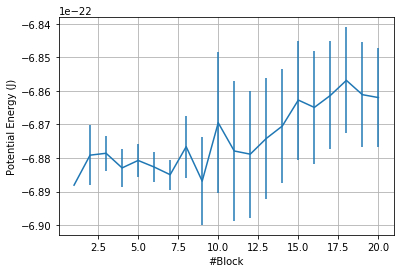

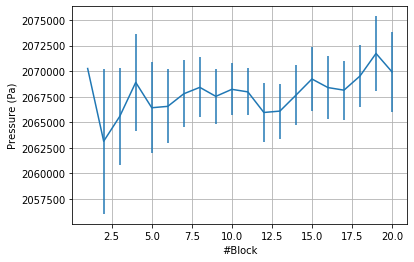

In [16]:
folder="gas_data/"

ave_epot = np.loadtxt(folder+"output.epot.0")
ave_pres = np.loadtxt(folder+"output.pres.0")

plt.errorbar(ave_epot[:,0],ave_epot[:,2] * T_conv * kb,yerr=ave_epot[:,3] * T_conv * kb)
plt.xlabel('#Block')
plt.ylabel('Potential Energy (J)')
plt.grid(True)
plt.show()

plt.errorbar(ave_pres[:,0],ave_pres[:,2] *P_conv,yerr=ave_pres[:,3] * P_conv)
plt.xlabel('#Block')
plt.ylabel('Pressure (Pa)')
plt.grid(True)
plt.show()

# Funzione di autocorrelazione a 2 corpi ( g(r) )

## Fase solida:

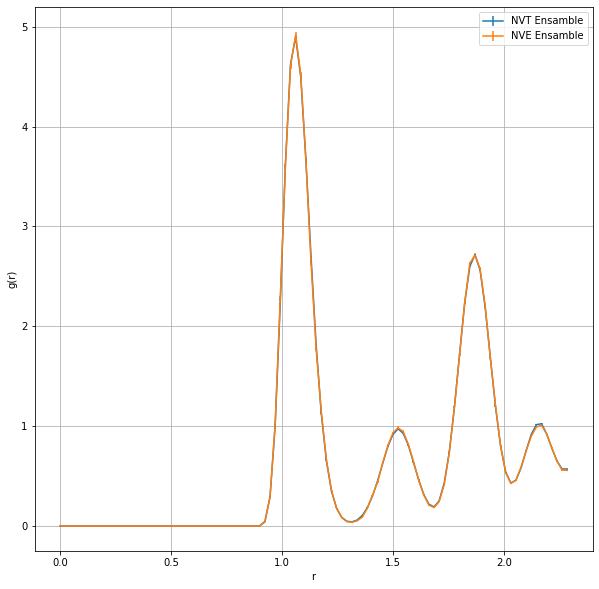

In [17]:
folder="solid_data/"

g_MC = np.loadtxt(folder+"output.gave.0")
g_MD = np.loadtxt("../04/"+folder+"output.gave.0")

plt.figure(figsize=(10,10))
plt.errorbar(g_MC[:,0], g_MC[:,1], yerr=g_MC[:,2], label="NVT Ensamble")
plt.errorbar(g_MD[:,0], g_MD[:,1], yerr=g_MD[:,2], label="NVE Ensamble")
plt.xlabel('r')
plt.ylabel('g(r)')
plt.legend(loc="best")
plt.grid(True)
plt.show()


## Fase liquida:

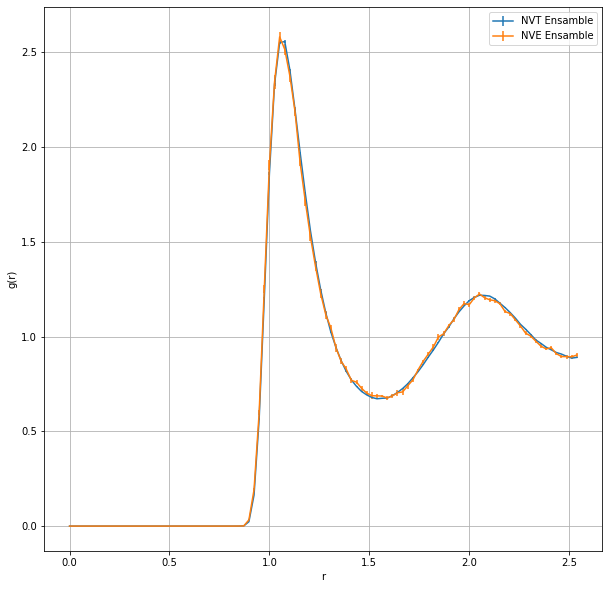

In [18]:
folder="liquid_data/"

g_MC = np.loadtxt(folder+"output.gave.0")
g_MD = np.loadtxt("../04/"+folder+"output.gave.0")

plt.figure(figsize=(10,10))
plt.errorbar(g_MC[:,0], g_MC[:,1], yerr=g_MC[:,2], label="NVT Ensamble")
plt.errorbar(g_MD[:,0], g_MD[:,1], yerr=g_MD[:,2], label="NVE Ensamble")
plt.xlabel('r')
plt.ylabel('g(r)')
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Fase gassosa:

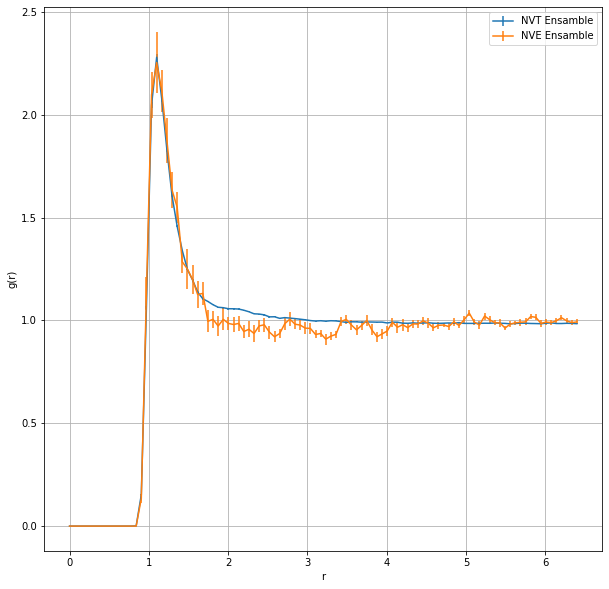

In [19]:
folder="gas_data/"

g_MC = np.loadtxt(folder+"output.gave.0")
g_MD = np.loadtxt("../04/"+folder+"output.gave.0")

plt.figure(figsize=(10,10))
plt.errorbar(g_MC[:,0], g_MC[:,1], yerr=g_MC[:,2], label="NVT Ensamble")
plt.errorbar(g_MD[:,0], g_MD[:,1], yerr=g_MD[:,2], label="NVE Ensamble")
plt.xlabel('r')
plt.ylabel('g(r)')
plt.legend(loc="best")
plt.grid(True)
plt.show()